In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split,cross_val_score ,GridSearchCV
from sklearn.preprocessing import StandardScaler

from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.1.3 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.

Traceback (most recent call last):  File "<frozen runpy>", line 198, in _run_module_as_main
  File "<frozen runpy>", line 88, in _run_code
  File "C:\Users\david\AppData\Roaming\Python\Python312\site-packages\ipykernel_launcher.py", line 18, in <module>
    app.launch_new_instance()
  File "C:\Users\david\AppData\Roaming\Python\Python312\site-packages\traitlets\config\application.py", line 1075, in launch_instance
    app.start()
  File "C:\Users\david\AppData\Roaming\Python\Python312\site-packages\ipykernel\kernelapp.py", line 739, in start
    self.io_lo

AttributeError: _ARRAY_API not found


A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.1.3 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.

Traceback (most recent call last):  File "<frozen runpy>", line 198, in _run_module_as_main
  File "<frozen runpy>", line 88, in _run_code
  File "C:\Users\david\AppData\Roaming\Python\Python312\site-packages\ipykernel_launcher.py", line 18, in <module>
    app.launch_new_instance()
  File "C:\Users\david\AppData\Roaming\Python\Python312\site-packages\traitlets\config\application.py", line 1075, in launch_instance
    app.start()
  File "C:\Users\david\AppData\Roaming\Python\Python312\site-packages\ipykernel\kernelapp.py", line 739, in start
    self.io_lo

ImportError: 
A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.1.3 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.



In [2]:
df = pd.read_csv('../data/processed_data.csv')
print(df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 26 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   gender                                 7043 non-null   int64  
 1   SeniorCitizen                          7043 non-null   int64  
 2   Partner                                7043 non-null   int64  
 3   Dependents                             7043 non-null   int64  
 4   tenure                                 7043 non-null   float64
 5   PhoneService                           7043 non-null   int64  
 6   OnlineSecurity                         7043 non-null   int64  
 7   DeviceProtection                       7043 non-null   int64  
 8   TechSupport                            7043 non-null   int64  
 9   StreamingTV                            7043 non-null   int64  
 10  StreamingMovies                        7043 non-null   int64  
 11  Pape

We will be repeating the same proccess for XGBoost that we did for Random Forest and Logistic Regression, so first lets split the data into a training and tsting set doing a 70:30 split ratio

In [3]:
X = df.drop('Churn',axis=1)
y = df['Churn']

#We will be spliting the data into training and test subdatasets
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [4]:
xgb = XGBClassifier()
xgb.fit(X_train,y_train)

y_pred = xgb.predict(X_test)
print(accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

0.7865593942262187
[[1373  166]
 [ 285  289]]
              precision    recall  f1-score   support

           0       0.83      0.89      0.86      1539
           1       0.64      0.50      0.56       574

    accuracy                           0.79      2113
   macro avg       0.73      0.70      0.71      2113
weighted avg       0.78      0.79      0.78      2113



And now a random split

In [5]:
X = df.drop('Churn',axis=1)
y = df['Churn']

#We will be spliting the data into training and test subdatasets
X_train_RS,X_test_RS,y_train_RS,y_test_RS = train_test_split(X, y, test_size=0.3, random_state=42, shuffle=True)

In [6]:
xgb_RS = XGBClassifier()
xgb_RS.fit(X_train_RS,y_train_RS)

y_pred_RS = xgb_RS.predict(X_test_RS)
print(accuracy_score(y_test_RS,y_pred_RS))
print(confusion_matrix(y_test_RS,y_pred_RS))
print(classification_report(y_test_RS,y_pred_RS))

0.7865593942262187
[[1373  166]
 [ 285  289]]
              precision    recall  f1-score   support

           0       0.83      0.89      0.86      1539
           1       0.64      0.50      0.56       574

    accuracy                           0.79      2113
   macro avg       0.73      0.70      0.71      2113
weighted avg       0.78      0.79      0.78      2113



And now a random split but with stratifcation

In [7]:
X = df.drop('Churn',axis=1)
y = df['Churn']

#We will be spliting the data into training and test subdatasets
X_train_RSS,X_test_RSS,y_train_RSS,y_test_RSS = train_test_split(X, y, test_size=0.3, random_state=42, shuffle=True, stratify=y)

In [8]:
xgb_RSS = XGBClassifier()
xgb_RSS.fit(X_train_RSS,y_train_RSS)

y_pred_RSS = xgb_RSS.predict(X_test_RSS)
print(accuracy_score(y_test_RSS,y_pred_RSS))
print(confusion_matrix(y_test_RSS,y_pred_RSS))
print(classification_report(y_test_RSS,y_pred_RSS))

0.7780407004259347
[[1361  191]
 [ 278  283]]
              precision    recall  f1-score   support

           0       0.83      0.88      0.85      1552
           1       0.60      0.50      0.55       561

    accuracy                           0.78      2113
   macro avg       0.71      0.69      0.70      2113
weighted avg       0.77      0.78      0.77      2113



So until now we can conclude that random split with manual split give off the same results while a random split with stratification scores lower, finaly we will do a 10 fold CV

In [9]:
xgb_CV = XGBClassifier()
cv_scores = cross_val_score(xgb_CV, X, y, cv=10, scoring='accuracy')
print("\nCross-Validation Results")
print(f"Cross-validation scores: {cv_scores}")
print(f"Mean cross-validation score: {cv_scores.mean()}")


Cross-Validation Results
Cross-validation scores: [0.79148936 0.78723404 0.8        0.79545455 0.77982955 0.75426136
 0.80965909 0.77272727 0.78693182 0.79829545]
Mean cross-validation score: 0.7875882495164411


So far the Cv has performed the best. Now lets do some hyperparammeter tuning with grid search

In [11]:
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')

# Define the parameter grid
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.7, 0.8, 1.0],
    'colsample_bytree': [0.7, 0.8, 1.0]
}

# Set up GridSearchCV
grid_search = GridSearchCV(estimator=xgb_model,param_grid=param_grid,cv=5,scoring='accuracy',verbose=1,n_jobs=-1)

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Get the best model
best_xgb_model = grid_search.best_estimator_

# Predict using the best model
y_pred_xgb_best = best_xgb_model.predict(X_test)

# Print best parameters
print("Best Hyperparameters:\n", grid_search.best_params_)

# Print results
print(accuracy_score(y_test,y_pred_xgb_best))
print(confusion_matrix(y_test,y_pred_xgb_best))
print(classification_report(y_test,y_pred_xgb_best))

Fitting 5 folds for each of 243 candidates, totalling 1215 fits
Best Hyperparameters:
 {'colsample_bytree': 1.0, 'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 50, 'subsample': 0.7}
0.8050165641268339
[[1411  128]
 [ 284  290]]
              precision    recall  f1-score   support

           0       0.83      0.92      0.87      1539
           1       0.69      0.51      0.58       574

    accuracy                           0.81      2113
   macro avg       0.76      0.71      0.73      2113
weighted avg       0.79      0.81      0.79      2113



c:\Users\david\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [12:41:30] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Finally after finding the best parameter lets compare all the models

In [12]:
def evaluate_model(y_true, y_pred, model_name):
    accuracy = accuracy_score(y_true, y_pred)
    confusion = confusion_matrix(y_true, y_pred)
    report = classification_report(y_true, y_pred, output_dict=True)
    return {
        'Model': model_name,
        'Accuracy': accuracy,
        'Precision': report['macro avg']['precision'],
        'Recall': report['macro avg']['recall'],
        'F1 Score': report['macro avg']['f1-score'],
        'Confusion Matrix': confusion
    }

# Evaluate all models
manual_split_results = evaluate_model(y_test, y_pred, 'Manual Split')
random_split_results = evaluate_model(y_test_RS, y_pred_RS, 'Random Split')
stratified_split_results = evaluate_model(y_test_RSS, y_pred_RSS, 'Stratified Random Split')
tuned_model_results = evaluate_model(y_test, y_pred_xgb_best, 'Tuned Model')

# Collect all results
comparison_results = [manual_split_results, random_split_results, stratified_split_results, tuned_model_results]

# Create a DataFrame for comparison
comparison_df = pd.DataFrame(comparison_results)
print("\nModel Comparison Results")
print(comparison_df)


Model Comparison Results
                     Model  Accuracy  Precision    Recall  F1 Score  \
0             Manual Split  0.786559   0.731635  0.697811  0.710320   
1             Random Split  0.786559   0.731635  0.697811  0.710320   
2  Stratified Random Split  0.778041   0.713715  0.690695  0.699942   
3              Tuned Model  0.805017   0.763114  0.711028  0.728641   

            Confusion Matrix  
0  [[1373, 166], [285, 289]]  
1  [[1373, 166], [285, 289]]  
2  [[1361, 191], [278, 283]]  
3  [[1411, 128], [284, 290]]  


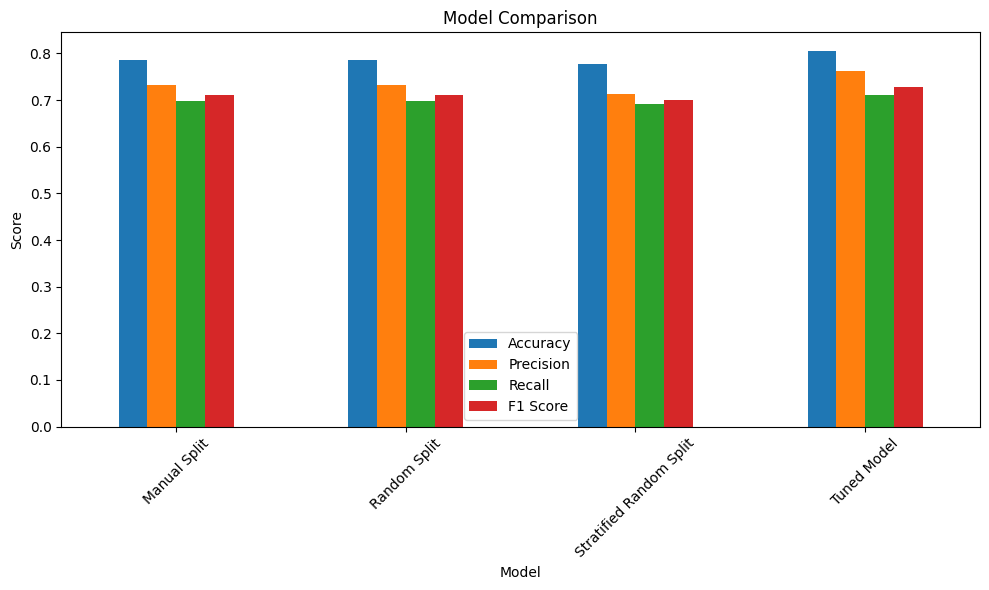

In [13]:
comparison_df.set_index('Model', inplace=True)
metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
comparison_df[metrics].plot(kind='bar', figsize=(10, 6))
plt.title('Model Comparison')
plt.ylabel('Score')
plt.xlabel('Model')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

And finally lets ballance out our classes and try out our best model on Sampled dataset, we have seen the distribution of classes teice before so now lets just oversample the data with SMOTE

In [14]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

C:\Users\david\AppData\Roaming\Python\Python312\site-packages\sklearn\base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(


In [15]:
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, 
                                                    test_size=0.2, 
                                                    random_state=42, 
                                                    stratify=y_resampled)

In [16]:
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')

# Define the parameter grid
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.7, 0.8, 1.0],
    'colsample_bytree': [0.7, 0.8, 1.0]
}

# Set up GridSearchCV
grid_search = GridSearchCV(estimator=xgb_model,param_grid=param_grid,cv=5,scoring='accuracy',verbose=1,n_jobs=-1)

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Get the best model
best_xgb_model_AS = grid_search.best_estimator_

# Predict using the best model
y_pred_xgb_best_AS = best_xgb_model_AS.predict(X_test)

# Print best parameters
print("Best Hyperparameters:\n", grid_search.best_params_)

# Print results
print(accuracy_score(y_test,y_pred_xgb_best_AS))
print(confusion_matrix(y_test,y_pred_xgb_best_AS))
print(classification_report(y_test,y_pred_xgb_best_AS))

Fitting 5 folds for each of 243 candidates, totalling 1215 fits


c:\Users\david\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [12:48:42] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Best Hyperparameters:
 {'colsample_bytree': 0.7, 'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 150, 'subsample': 1.0}
0.8270531400966183
[[816 219]
 [139 896]]
              precision    recall  f1-score   support

           0       0.85      0.79      0.82      1035
           1       0.80      0.87      0.83      1035

    accuracy                           0.83      2070
   macro avg       0.83      0.83      0.83      2070
weighted avg       0.83      0.83      0.83      2070



After looking throung the results its time to save our best model which is XGB after oversampling with SMOTE

In [17]:
import joblib
joblib.dump(best_xgb_model_AS, 'best_xgb_model_AS.pkl')

['best_xgb_model_AS.pkl']